# Fort McMurray Wildfire Analysis
The stated goal of this excerise is to analyze air quality in the city of Edmonton. My hypothesis is that air quality will be signficantly higher during the months of the wildfire as compared to other years.  

## Data Cleaning
First, load the data from our XLSX file.

In [132]:
import pandas as pd

edmonton_air_quality_2016 = pd.read_excel('data/Edmonton2016.xlsx', sheet_name='PM2.5-10')
edmonton_air_quality_2016.columns

Index(['Sampler', 'Unnamed: 1', 'Unnamed: 2', 'S-1', 'S-1.1', 'S-1.2', 'S-1.3',
       'S-1.4', 'S-1.5', 'S-1.6', 'S-1.7'],
      dtype='object')

So these column names don't make a lot of sense. When looking into the data, the first 10 rows are metadata. Lets create a function that cleans this up.

In [118]:
def cleanAirQualityData(airQualityData):
    airQualityData.columns = airQualityData.iloc[8, :]
    airQualityData = airQualityData[9:]
    return airQualityData

edmonton_air_quality_2016 = cleanAirQualityData(edmonton_air_quality_2016)
edmonton_air_quality_2016.head()

8,NAPS Site ID,Sampling Date,Sample Type,PM2.5-10,PM2.5-10-MDL,PM2.5-10-Vflag,Pres.,Temp.,Start Time,End Time,Actual Volume
9,90132,2016-01-01 00:00:00,R,28.1111,0.37037,,93.5923,-3,00:00,24:00,2.4
10,90132,2016-01-04 00:00:00,R,14.8009,0.37037,,92.7924,-10,00:00,24:00,2.4
11,90132,2016-01-07 00:00:00,R,2.75463,0.37037,,93.5923,-9.3,00:00,24:00,2.4
12,90132,2016-01-10 00:00:00,R,-999,-999,M1,-999,-999,-999,-999,-999
13,90132,2016-01-13 00:00:00,R,0.666667,0.37037,,91.8591,3.1,00:00,24:00,2.4


So our labels and data seem a little more sensible. To produce anything meaningful, it is important to engage our data and see if there are clear irregularities and outliers in our data. An useful procedure is to perform an ANOVA test or even plotting our data to see if we can catch the rogue datum. Lets create a function to plot our data.

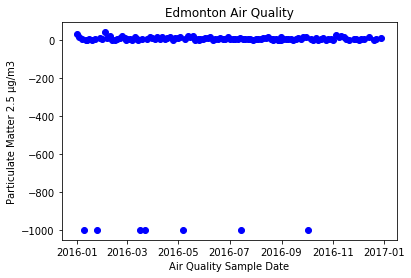

In [119]:
import matplotlib.pyplot as plt
def plotAirQuality(array_of_data):
    for i in array_of_data:
        plt.ylabel('Particulate Matter 2.5 µg/m3')
        plt.xlabel('Air Quality Sample Date')
        plt.title('Edmonton Air Quality')
        plt.plot(i['Sampling Date'], i['PM2.5-10'], 'bo')

        plt.show()
    
plotAirQuality([edmonton_air_quality_2016])

The values at the bottom of the graph are suspect, lets find the smallest value in in PM2 column and see what we're dealing with.

In [120]:
import numpy as np
np.min(edmonton_air_quality_2016['PM2.5-10'])

-999

First thing, we should notice is that having negative particles in the air doesn't really make sense. Second thing, we should notice is that all these values are the same. We could reasonably assume that this value represents instrumentation failure or an empty datum. Lets remove these points and plot again.

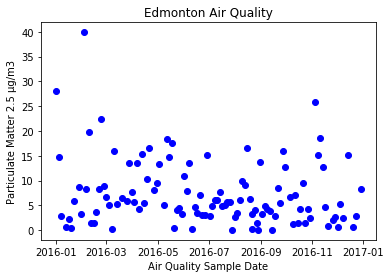

In [124]:
edmonton_air_quality_2016 = edmonton_air_quality_2016[edmonton_air_quality_2016['PM2.5-10'] >= 0]

plotAirQuality([edmonton_air_quality_2016])

So what do we make of this data? It's somewhat hard to understand. There are several observations to make here. There is more particulate matter in the winter months which is pretty sensible in that there is guaranteed coal burning to heat people's homes. In the months, March to November, we see a relatively stable distribution between 0 and 20 PM µg/m3. It's harder to gain any real understanding of any larger picture without knowing some priors. What is the average distribution of air quality in the years without the fire. 

** Lets get more data. **

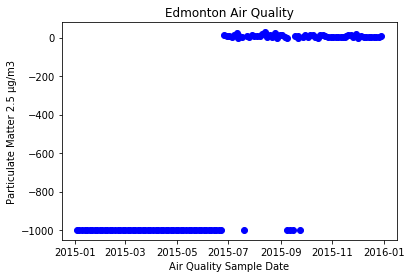

In [128]:
edmonton_air_quality_2015 = pd.read_excel('data/Edmonton2015.xlsx', sheet_name='PM2.5-10')
edmonton_air_quality_2015 = cleanAirQualityData(edmonton_air_quality_2015)

plotAirQuality([edmonton_air_quality_2015])

Unfortunately, we're running into the same issue as before, however, it seems as if we're missing data from Janurary of 2015 to July of 2015 which is a much longer gap. With this missing data it really is hard to make any conclusions.

Lets remove the negative numbers.

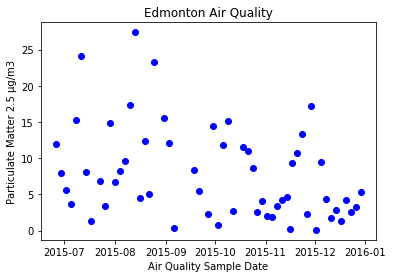

In [131]:
edmonton_air_quality_2015 = edmonton_air_quality_2015[edmonton_air_quality_2015['PM2.5-10'] >= 0]

plotAirQuality([edmonton_air_quality_2015])

While we have some numbers, there is not too much we can do in comparing the numbers with the months of the fire.

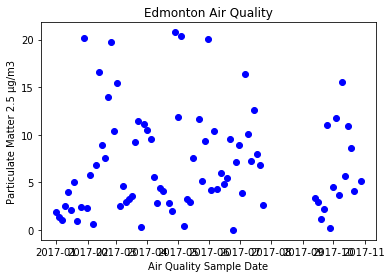

In [139]:
edmonton_air_quality_2017 = pd.read_excel('data/Edmonton2017.xlsx', sheet_name='PM2.5-10')
edmonton_air_quality_2017 = cleanAirQualityData(edmonton_air_quality_2017)
edmonton_air_quality_2017 = edmonton_air_quality_2017[edmonton_air_quality_2017['PM2.5-10'] >= 0]
plotAirQuality([edmonton_air_quality_2017])

It is hard to interpret 2017. The overall air quality consistently reads up to 20 2.5 µg/m3 during various parts of the year but without any contextual understanding of what may be causing these increases, 

In conclusion, while we have some gage into when particulate matter is most abundant in the year, it really can't be used to find any correlation with the Fort McMurray wildfire months. The best conclusion to make if that we need cleaner data in the case that it may one day be useful.